<h2></h2>


<h1><center><u>MAJOR PROJECT</u></center></h1>
<h2><center><u>AIR POLLUTION IN INDIA</u></center></h2>
<h2><center><u>NOTEBOOK USED FOR MODELING</u></center></h2>
<h2 style="text-align:right">Submitted By:</h2>
<h2 style="text-align:right">-</h2>
<h2 style="text-align:right">-</h2>

<h4>Include the libraries that we are going to use</h4>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from numpy import log
from statsmodels.tsa.stattools import adfuller
import sys
from pandas.plotting import lag_plot
import numpy as np
import numpy as np
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

In [2]:
df = pd.read_csv('final.csv', index_col=0)#load the data from csv named final.csv

In [3]:
df.head()

,City,Coordinates,Time,PM10_min,PM10_max,PM10_avg,PM2.5_min,PM2.5_max,PM2.5_avg,NO2_min,...,NH3_avg,SO2_min,SO2_max,SO2_avg,CO_min,CO_max,CO_avg,OZONE_min,OZONE_max,OZONE_avg
0,Yamunanagar,"[30.2112003, 77.28638972360895]",2020-09-22 14:00:00,78.0,170.0,121.0,59.0,239.0,134.0,14.0,...,5.0,3.0,7.0,6.0,19.0,74.0,22.0,10.0,122.0,32.0
1,Karnal,"[29.6803266, 76.9896254]",2020-09-22 14:00:00,64.0,113.0,91.0,42.0,227.0,111.0,1.0,...,3.0,5.0,109.0,13.0,16.0,44.0,19.0,4.0,43.0,13.0
2,Ahmedabad,"[23.0216238, 72.5797068]",2020-09-22 14:00:00,57.0,93.0,69.0,13.0,89.0,48.0,23.0,...,NaN,4.0,121.0,28.0,10.0,77.0,37.0,4.0,127.0,52.0
3,Ajmer,"[26.4691, 74.639]",2020-09-22 14:00:00,44.0,114.0,80.0,29.0,147.0,65.0,9.0,...,5.0,9.0,12.0,11.0,24.0,82.0,42.0,6.0,83.0,61.0
4,Alwar,"[27.639077049999997, 76.6144524902045]",2020-09-22 14:00:00,68.0,95.0,81.0,60.0,81.0,71.0,13.0,...,4.0,3.0,29.0,19.0,15.0,40.0,26.0,5.0,84.0,28.0


## DELHI


In [4]:
tdf = df[df['City']=='Delhi']#lets take the target city as delhi first then we will look at models for other cities

In [5]:
tdf.columns#remove these columns as our main focus is on PM2.5_avg we drop others columns for now

Index(['City', 'Coordinates', 'Time', 'PM10_min', 'PM10_max', 'PM10_avg',
       'PM2.5_min', 'PM2.5_max', 'PM2.5_avg', 'NO2_min', 'NO2_max', 'NO2_avg',
       'NH3_min', 'NH3_max', 'NH3_avg', 'SO2_min', 'SO2_max', 'SO2_avg',
       'CO_min', 'CO_max', 'CO_avg', 'OZONE_min', 'OZONE_max', 'OZONE_avg'],
      dtype='object')

#### After dropping these columns we set date as index and make a univariate time series

In [6]:
drop_columns=['PM10_min', 'PM10_max', 'PM10_avg', 'PM2.5_min', 'PM2.5_max'
       , 'NO2_min', 'NO2_max', 'NO2_avg', 'NH3_min', 'NH3_max',
       'NH3_avg', 'SO2_min', 'SO2_max', 'SO2_avg', 'CO_min', 'CO_max',
       'CO_avg', 'OZONE_min', 'OZONE_max', 'OZONE_avg', 'Coordinates']

In [7]:
tdf.drop(columns=drop_columns,axis=1,inplace=True)

C:\Users\pratham\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [8]:
tdf.drop(columns='City',axis=1,inplace=True)

In [9]:
tdf['Time']= pd.to_datetime(tdf['Time'],dayfirst=True)
# Set the index to the 'date' column
tdf.set_index('Time', inplace = True)
tdf.dtypes

<ipython-input-9-5eff9ba739b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['Time']= pd.to_datetime(tdf['Time'],dayfirst=True)


PM2.5_avg    float64
dtype: object

In [10]:
tdf##Final time series

,PM2.5_avg
Time,
2020-09-22 14:00:00,96.823529
2020-09-22 16:00:00,90.558824
2020-09-22 19:00:00,81.400000
2020-09-22 22:00:00,73.914286
2020-09-23 04:00:00,59.057143
...,...
2020-10-21 17:00:00,242.161290
2020-10-21 18:00:00,239.300000
2020-10-21 19:00:00,238.633333


In [11]:
b=tdf.resample('12H').mean()

In [12]:
b=b.interpolate()

<Figure size 720x720 with 0 Axes>

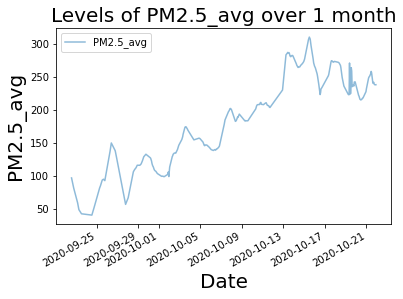

In [13]:
plt.figure(figsize=(10, 10))
tdf.plot(alpha=0.5, style='-')
plt.title('Levels of PM2.5_avg over 1 month', fontsize=20)
plt.ylabel('PM2.5_avg',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.show()

<Figure size 720x720 with 0 Axes>

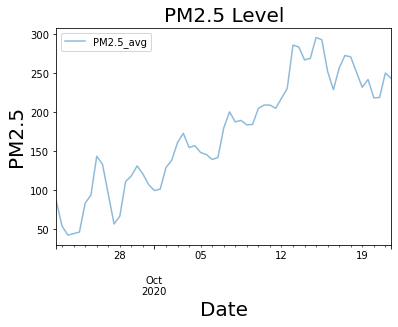

In [14]:
plt.figure(figsize=(10, 10))
b.plot(alpha=0.5, style='-')
plt.title('PM2.5 Level', fontsize=20)
plt.ylabel('PM2.5',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.show()

#### It can be observed from the plot that time series has trend and seasonality so our data is not stationary lets further verify this by performing the AD fuller test and it also confirms the value for the parameter d in ARIMA model

In [15]:
from statsmodels.tsa.stattools import adfuller
print("p-value:", adfuller(b['PM2.5_avg'].dropna())[1])

p-value: 0.473341139756345


In [16]:
print("p-value:", adfuller(b['PM2.5_avg'].diff().dropna())[1])

p-value: 1.0422639955747807e-08


## differencing =1 i.e. d=1 in ARIMA d=1



#### As it can be clearly seen that for d=1 our data passes the AD Fuller test  now lets find out seasonality for the data

In [17]:
b['new']=b['PM2.5_avg']#made copy because there was a decimal in PM2.5_avg column name
c=b.copy()

In [18]:
c.drop(['PM2.5_avg'],axis=1,inplace=True)

In [19]:
c.groupby(pd.Grouper(freq="W")).new.idxmax()

Time
2020-09-27   2020-09-26 00:00:00
2020-10-04   2020-10-03 12:00:00
2020-10-11   2020-10-10 12:00:00
2020-10-18   2020-10-15 00:00:00
2020-10-25   2020-10-21 00:00:00
Freq: W-SUN, Name: new, dtype: datetime64[ns]

In [20]:
summary=c.groupby(pd.Grouper(freq="W")).agg(
    max_Level = pd.NamedAgg(column='new', aggfunc='max'),
    max_Date = pd.NamedAgg(column='new', aggfunc='idxmax'))

In [21]:
summary['max_Date'][1]-summary['max_Date'][2]

Timedelta('-7 days +00:00:00')

In [22]:
summary

,max_Level,max_Date
Time,,
2020-09-27,143.436492,2020-09-26 00:00:00
2020-10-04,172.814516,2020-10-03 12:00:00
2020-10-11,209.065720,2020-10-10 12:00:00
2020-10-18,295.706575,2020-10-15 00:00:00
2020-10-25,250.124180,2020-10-21 00:00:00


In [23]:
summary.shift(1)

,max_Level,max_Date
Time,,
2020-09-27,NaN,NaT
2020-10-04,143.436492,2020-09-26 00:00:00
2020-10-11,172.814516,2020-10-03 12:00:00
2020-10-18,209.065720,2020-10-10 12:00:00
2020-10-25,295.706575,2020-10-15 00:00:00


In [24]:
summary-summary.shift(1)

,max_Level,max_Date
Time,,
2020-09-27,NaN,NaT
2020-10-04,29.378024,7 days 12:00:00
2020-10-11,36.251204,7 days 00:00:00
2020-10-18,86.640855,4 days 12:00:00
2020-10-25,-45.582395,6 days 00:00:00


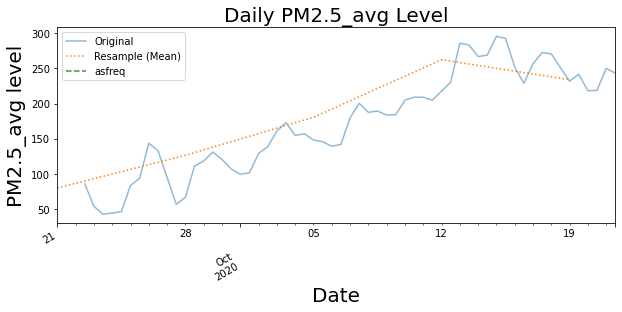

In [25]:
plt.figure(figsize=(10, 4))
ax = plt.gca()
c.plot(alpha=0.5, style='-',ax=ax)
c.resample('W').mean().plot(style=':',ax=ax)   ## Mean taken weekly
c.asfreq('W').plot(style='--',ax=ax);        
plt.legend(['Original', 'Resample (Mean)', 'asfreq'],
loc='upper left',fontsize=10);
plt.title('Daily PM2.5_avg Level', fontsize=20)
plt.ylabel('PM2.5_avg level',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.show()

### Let's Decompose our data into different components and observe their plots

In [26]:
b.drop(['new'],axis=1,inplace=True)

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(b, model='multiplicative', period =7)
trend    = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [28]:
trend.head()

Time
2020-09-22 12:00:00          NaN
2020-09-23 00:00:00          NaN
2020-09-23 12:00:00          NaN
2020-09-24 00:00:00    64.190309
2020-09-24 12:00:00    72.442071
Freq: 12H, Name: trend, dtype: float64

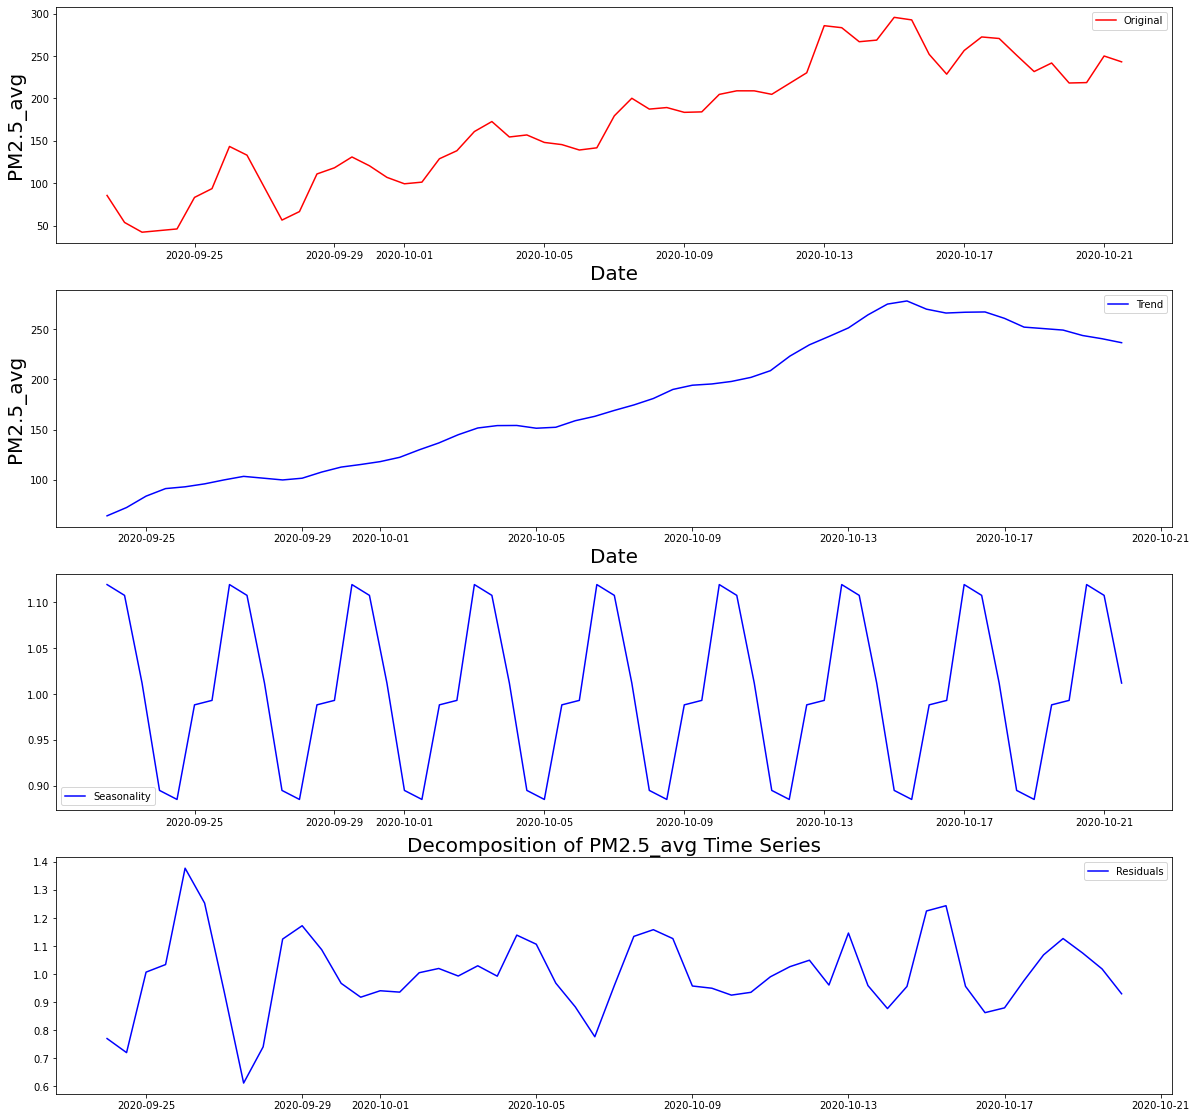

<Figure size 432x288 with 0 Axes>

In [29]:

plt.figure(figsize=(20,20))
plt.subplot(411)
plt.plot(b, label='Original', color="red")
plt.legend(loc='best')
plt.ylabel('PM2.5_avg',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.ylabel('PM2.5_avg',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.title('Decomposition of PM2.5_avg Time Series', fontsize=20)
plt.show()

plt.tight_layout()

## The plot shows that the data has both trend & seasonality. That means it is not stationary.

In [30]:
from statsmodels.tsa.stattools import adfuller
print("p-value:", adfuller(trend.dropna())[1])

p-value: 0.6435080097718051


In [31]:
#Here we have done 90/10 split of our data 
train_data=b[:datetime(2020,10,18)]
test_data=b[datetime(2020,10,19):datetime(2020,10,21)]

In [32]:
data_d = b.diff().dropna()

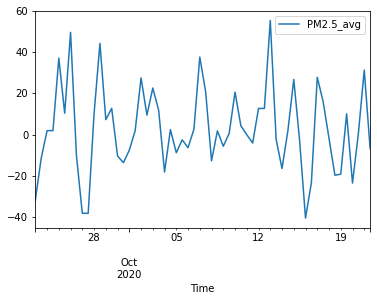

In [33]:
data_d.plot()

In [34]:
data_d.shape

(58, 1)

In [35]:
data_d.head(2)

,PM2.5_avg
Time,
2020-09-23 00:00:00,-31.836765
2020-09-23 12:00:00,-11.513866


In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

# Differenced Version with d=1


In [37]:
print("p-value:", adfuller(b['PM2.5_avg'].diff().dropna())[1])

p-value: 1.0422639955747807e-08


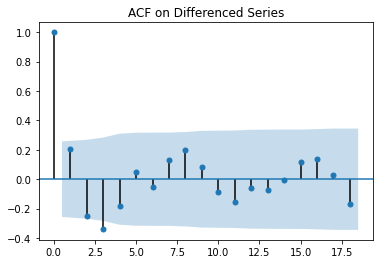

In [38]:
fig = plot_acf(b['PM2.5_avg'].diff().dropna(), 
               title="ACF on Differenced Series") 

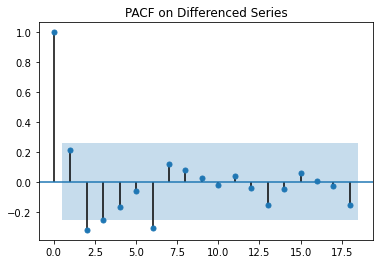

In [39]:
fig = plot_pacf(b['PM2.5_avg'].diff().dropna(), 
               title="PACF on Differenced Series") 

#### It can be seen p=2 from the pacf plot and we have to keep one of p or q=1 so lets try q with different values and we get best results for q=1

In [61]:
model3 = ARIMA(train_data['PM2.5_avg'], order=(2,1,1))
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.PM2.5_avg   No. Observations:                   51
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -216.546
Method:                       css-mle   S.D. of innovations             16.269
Date:                Wed, 18 Nov 2020   AIC                            443.092
Time:                        18:27:31   BIC                            452.751
Sample:                    09-23-2020   HQIC                           446.783
                         - 10-18-2020                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.4538      0.276     16.152      0.000       3.913       4.994
ar.L1.D.PM2.5_avg     0.9501      0.123      7.694      0.000       0.708       1.192
ar.L2.D.PM2.5_avg    -0.5028      0.121     -4.147      0.000      -0.740      -0.265
ma.L1.D.PM2.5_avg    -1.0000      0.074    -13.430      0.000      -1.146      -0.854
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9448           -1.0470j            1.4103           -0.1332
AR.2            0.9448           +1.0470j            1.4103            0.1332
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [62]:
fcast3=results3.forecast(5)
fcast3=pd.DataFrame({"Forecast": fcast3[0]},index=test_data.index)
residuals3 = test_data - fcast3.values
residuals3.head()

,PM2.5_avg
Time,
2020-10-19 00:00:00,-45.304217
2020-10-19 12:00:00,-44.581203
2020-10-20 00:00:00,-76.340031
2020-10-20 12:00:00,-81.396188
2020-10-21 00:00:00,-53.635508


In [63]:
fcast3

,Forecast
Time,
2020-10-19 00:00:00,277.068082
2020-10-19 12:00:00,286.433545
2020-10-20 00:00:00,294.623902
2020-10-20 12:00:00,300.158146
2020-10-21 00:00:00,303.759688


Text(0, 0.5, 'Error')

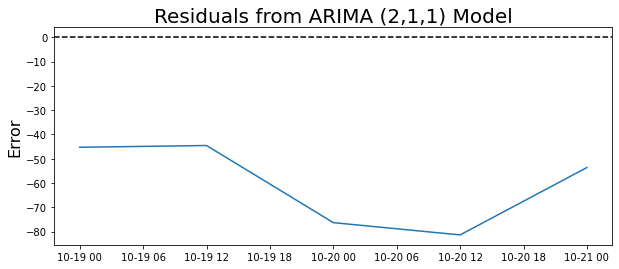

In [64]:
plt.figure(figsize=(10,4))
plt.plot(residuals3)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from ARIMA (2,1,1) Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

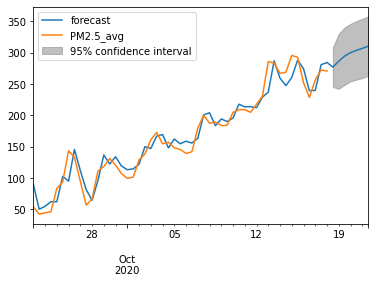

In [44]:
results3.plot_predict(1, 58)
plt.show()

In [45]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals3/test_data)),6))

Mean Absolute Percent Error: PM2.5_avg    0.26321
dtype: float64


In [46]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals3**2)))

Root Mean Squared Error: PM2.5_avg    62.241245
dtype: float64


## Finally we fit our data in Seasonal ARIMA model to get  the better forecasting

### Here we use auto arima to select the parameters for the SARIMA model

In [47]:
import pmdarima

In [48]:
from pmdarima import auto_arima
pm_arima = auto_arima(train_data['PM2.5_avg'], test = 'adf'
                      , start_p=1, start_q=1, m = 7,
                      stepwise=True, trace = True, 
                      suppress_warnings=True,
                      error_action='ignore', seasonal = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=460.539, Time=0.77 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=458.720, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=459.011, Time=0.28 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=457.078, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=458.237, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=455.886, Time=0.12 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=456.936, Time=0.39 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=458.788, Time=0.64 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=457.770, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=457.791, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(0,1,1)(0,0,0)[7]             : AIC=454.699, Time=0.10 sec
 ARIMA(0,1,1)(1,0,0)[7]             : AIC=455.543, Time=0.17 sec
 ARIMA(0,1,1)(0,0,1)[7]             : AIC=455.732, Time

### Fit the SARIMA Model


In [49]:
my_order = (0,1,1)
my_seasonal_order = (0, 0, 0, 7)
# define model
model4 = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)

In [50]:
#fit the model
start = time()
model4_fit = model4.fit()
end = time()
print('Model Fitting Time:', end - start)

Model Fitting Time: 0.18090200424194336


In [51]:
#summary of the model
print(model4_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              PM2.5_avg   No. Observations:                   52
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -225.350
Date:                Wed, 18 Nov 2020   AIC                            454.699
Time:                        17:46:58   BIC                            458.563
Sample:                    09-22-2020   HQIC                           456.176
                         - 10-18-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3549      0.133      2.677      0.007       0.095       0.615
sigma2       402.0953     74.114      5.425      0.000     256.835     547.356
Ljung-Box (Q):                       43.35   Jarque-

In [52]:
fcast4=model4_fit.forecast(5)
fcast4=pd.DataFrame({"Forecast": fcast4[0]},index=test_data.index)
residuals4 = test_data - fcast4.values
residuals4.head()

,PM2.5_avg
Time,
2020-10-19 00:00:00,-37.751205
2020-10-19 12:00:00,-27.662729
2020-10-20 00:00:00,-51.231200
2020-10-20 12:00:00,-50.753113
2020-10-21 00:00:00,-19.390891


Text(0, 0.5, 'Error')

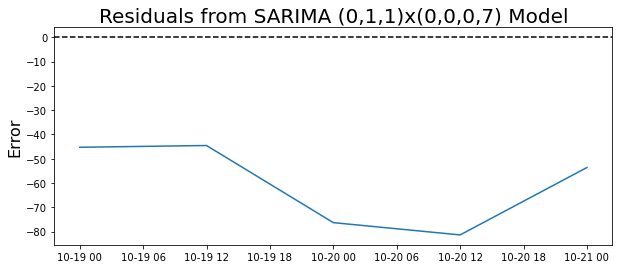

In [53]:
plt.figure(figsize=(10,4))
plt.plot(residuals3)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA (0,1,1)x(0,0,0,7) Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

In [54]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals4/test_data)),5))

Mean Absolute Percent Error: PM2.5_avg    0.1643
dtype: float64


In [55]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals4**2)))

Root Mean Squared Error: PM2.5_avg    39.412945
dtype: float64


## So as we can observe we are getting 16.43% MAPE in our final model, and every P>|z| is very small in model summary 

 <hr>

<hr>

<h2><center>We have other notebooks too for different metro cities but this one is the main and other modelling notebook have similar method of modeling</center></h2>
<h2><center>One of the things we could have done in addition is that we could have created the models for other pollutants too but that would have resulted in too much too handle </center></h2>
<h2><center>We have also tried to make the timeseries daywise but this one(resampled at 12 Hrs) gave us better accuracy</center></h2>